# Introduction
The sinking of Titanic is one of the most notorious shipwrecks in the history. In 1912, during her voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

<font color = 'blue'>
Content: 

1. [Load and Check Data](#1)
1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualization](#11)
    * [Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived](#12)
    * [SibSp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Pclass -- Survived](#15)
    * [Age -- Survived](#16)
    * [Pclass -- Survived -- Age](#17)
    * [Embarked -- Sex -- Pclass -- Survived](#18)
    * [Embarked -- Sex -- Fare -- Survived](#19)
    * [Fill Missing: Age Feature](#20)
1. [Feature Engineering](#21)
    * [Name -- Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger ID and Cabin](#28)
1. [Modeling](#29)
    * [Train - Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32) 
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

1. <a id = "1"></a><br>
# Load and Check Data

In [3]:
cwd = os.getcwd()  # your current working directory (cwd)
files = os.listdir(cwd)  # This will Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/Users/demir/ders/project_full': ['finalized_model.sav', '.DS_Store', 'web_deploy.py', 'test.csv', 'titanic.csv', 'preprocessing.py', 'train.csv', '.ipynb_checkpoints', 'titanic_project.ipynb']


In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_PassengerId = test_df["PassengerId"]

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "2"></a><br>
# Variable Description
1. PassengerId: unique id number to each passenger
1. Survived: passenger survive(1) or died(0)
1. Pclass: passenger class
1. Name: name
1. Sex: gender of passenger 
1. Age: age of passenger 
1. SibSp: number of siblings/spouses
1. Parch: number of parents/children 
1. Ticket: ticket number 
1. Fare: amount of money spent on ticket
1. Cabin: cabin category
1. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare ve Age
* int64(5): Pclass, sibsp, parch, passengerId and survived
* object(5): Cabin, embarked, ticket, name and sex

<a id = "3"></a><br>
# Univariate Variable Analysis
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: Fare, age and passengerId

<a id = "4"></a><br>
## Categorical Variable

In [9]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    

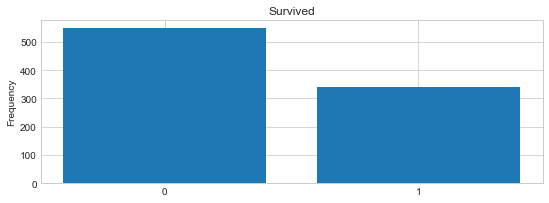

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


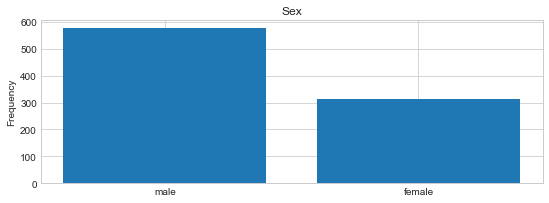

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


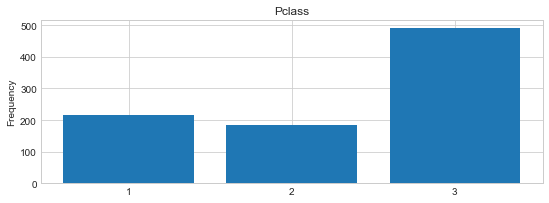

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


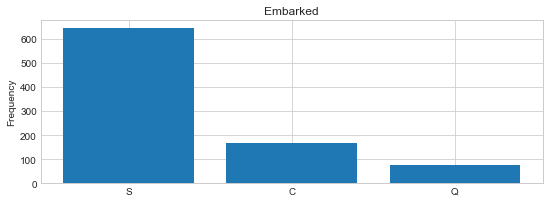

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


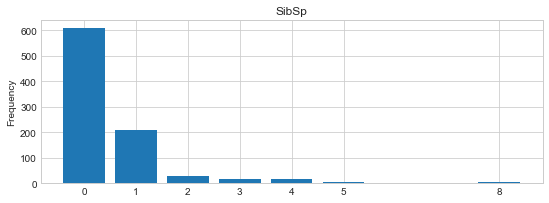

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


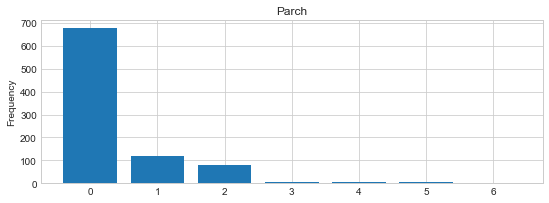

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [10]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [11]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



<a id = "5"></a><br>
## Numerical Variable

In [12]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

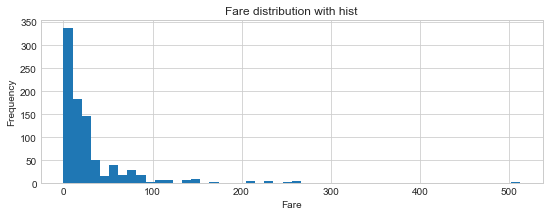

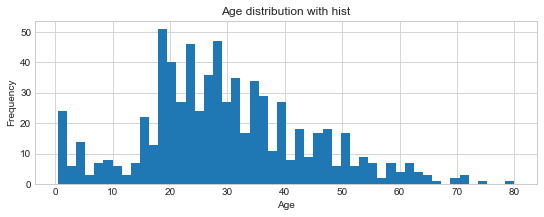

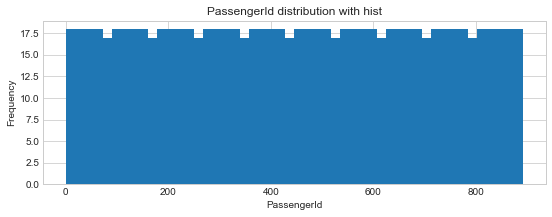

In [13]:
numericVar = ["Fare", "Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

<a id = "6"></a><br>
# Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [14]:
# Plcass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
# Sibsp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id = "7"></a><br>
# Outlier Detection

In [18]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [19]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [20]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

<a id = "8"></a><br>
# Missing Value
* Find Missing Value
* Fill Missing Value

In [21]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id = "9"></a><br>
## Find Missing Value

In [23]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [24]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id = "10"></a><br>
## Fill Missing Value
* Embarked has 2 missing value
* Fare has only 1

In [25]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


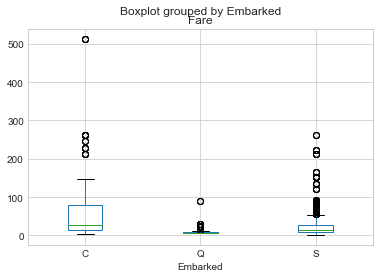

In [26]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [27]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [28]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [29]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [30]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "11"></a><br>
# Visualization

<a id = "12"></a><br>
## Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived

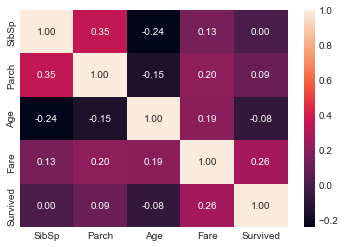

In [31]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

Fare feature seems to have correlation with survived feature (0.26).

<a id = "13"></a><br>
## SibSp -- Survived

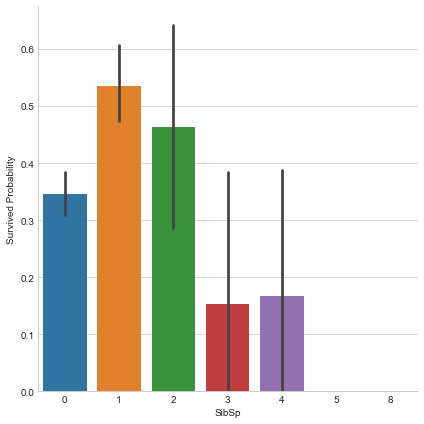

In [32]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

* Having a lot of SibSp have less chance to survive.
* if sibsp == 0 or 1 or 2, passenger has more chance to survive
* we can consider a new feature describing these categories.

<a id = "14"></a><br>
## Parch -- Survived

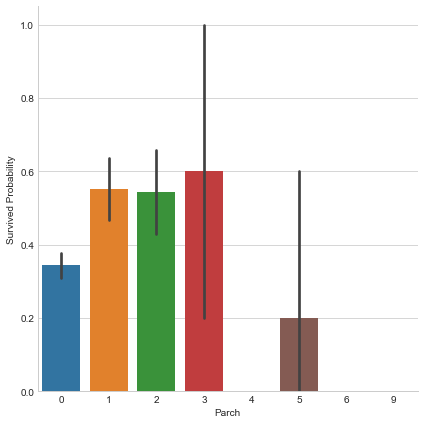

In [33]:
g = sns.factorplot(x = "Parch", y = "Survived", kind = "bar", data = train_df, size = 6)
g.set_ylabels("Survived Probability")
plt.show()

* Sibsp and parch can be used for new feature extraction with th = 3
* small familes have more chance to survive.
* there is a std in survival of passenger with parch = 3

<a id = "15"></a><br>
## Pclass -- Survived

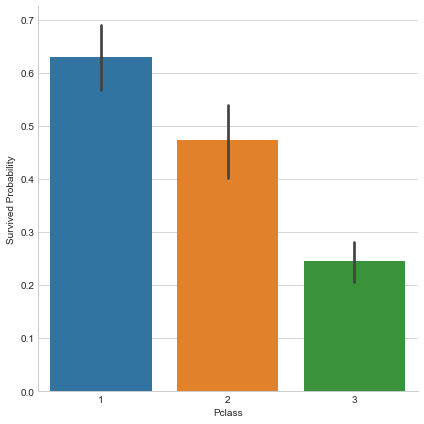

In [34]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

<a id = "16"></a><br>
## Age -- Survived

/Users/demir/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/demir/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


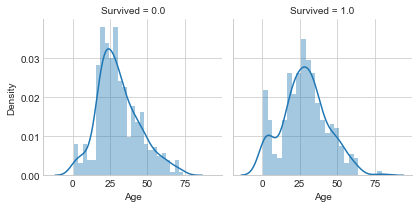

In [35]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

* age <= 10 has a high survival rate,
* oldest passengers (80) survived,
* large number of 20 years old did not survive,
* most passengers are in 15-35 age range,
* use age feature in training
* use age distribution for missing value of age

<a id = "17"></a><br>
## Pclass -- Survived -- Age

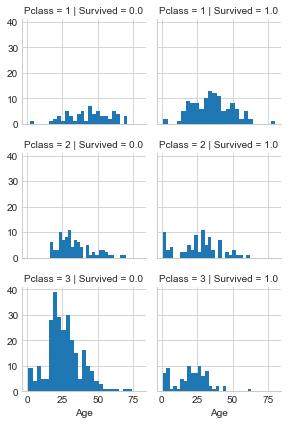

In [36]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass", size = 2)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

* pclass is important feature for model training.

<a id = "18"></a><br>
## Embarked -- Sex -- Pclass -- Survived

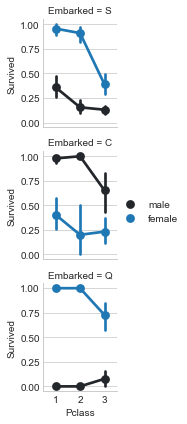

In [37]:
g = sns.FacetGrid(train_df, row = "Embarked", size = 2)
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than males.
* males have better survşval rate in pclass 3 in C.
* embarked and sex will be used in training.

<a id = "19"></a><br>
## Embarked -- Sex -- Fare -- Survived

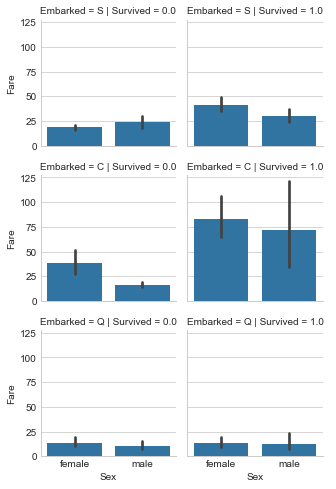

In [38]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

* Passsengers who pay higher fare have better survival. Fare can be used as categorical for training.

<a id = "20"></a><br>
## Fill Missing: Age Feature

In [39]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


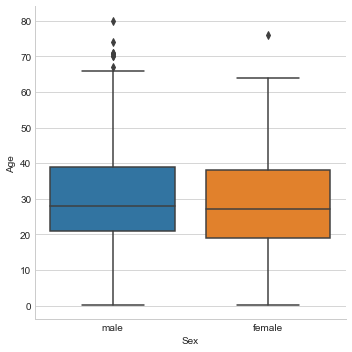

In [40]:
sns.factorplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

Sex is not informative for age prediction, age distribution seems to be same.

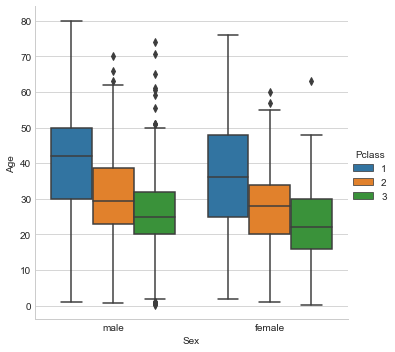

In [41]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data = train_df, kind = "box")
plt.show()

1st class passengers are older than 2nd, and 2nd is older than 3rd class. 

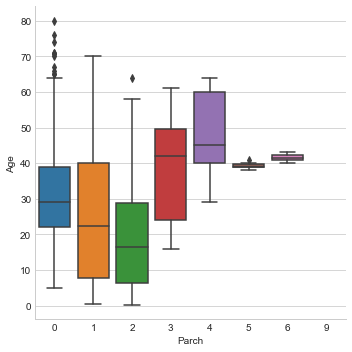

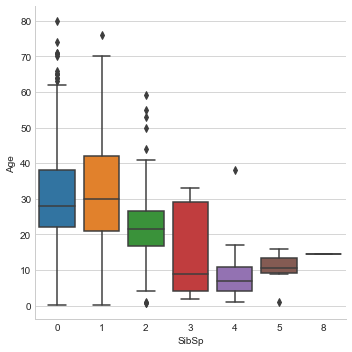

In [42]:
sns.factorplot(x = "Parch", y = "Age", data = train_df, kind = "box")
sns.factorplot(x = "SibSp", y = "Age", data = train_df, kind = "box")
plt.show()

In [43]:
#train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

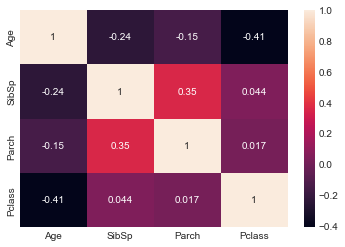

In [44]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

In [45]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

/Users/demir/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [46]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "21"></a><br>
# Feature Engineering


<a id = "22"></a><br>
## Name -- Title

In [47]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [48]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [49]:
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

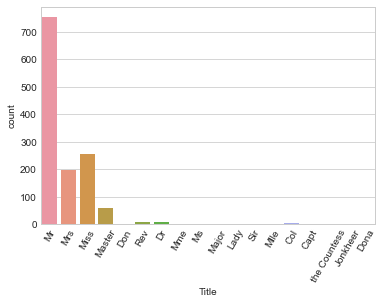

In [50]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [51]:
# convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

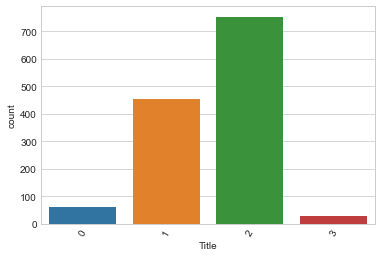

In [52]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

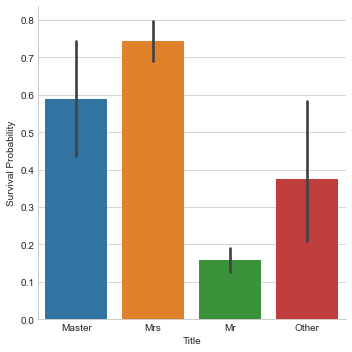

In [53]:
g = sns.factorplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [54]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [55]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [56]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


<a id = "23"></a><br>
## Family Size

In [57]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [58]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [59]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


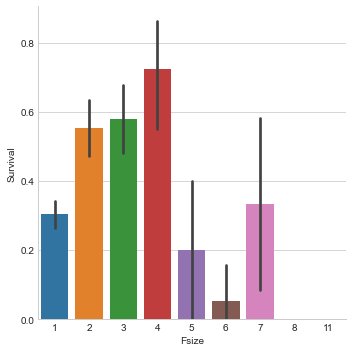

In [60]:
g = sns.factorplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

In [61]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [62]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
5,6,0.0,3,male,25.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1
6,7,0.0,1,male,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,1
7,8,0.0,3,male,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0,5,0
8,9,1.0,3,female,27.0,0,2,347742,11.1333,NaN,S,0,1,0,0,3,1
9,10,1.0,2,female,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,1


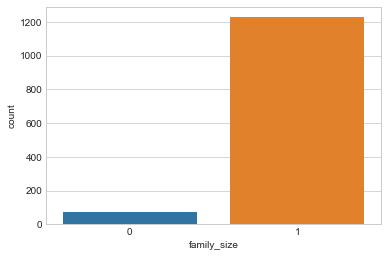

In [63]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

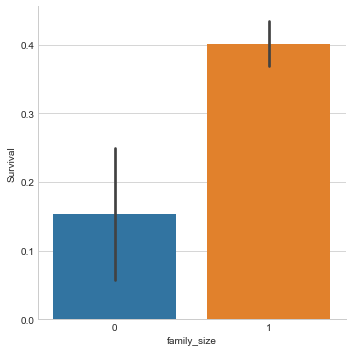

In [64]:
g = sns.factorplot(x = "family_size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

Small familes have more chance to survive than large families.

In [65]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


<a id = "24"></a><br>
## Embarked

In [66]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

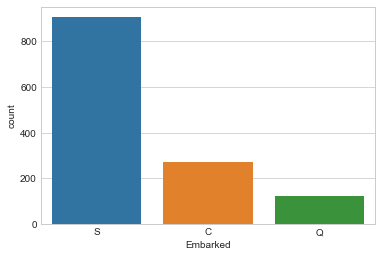

In [67]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [68]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


<a id = "25"></a><br>
## Ticket

In [69]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [70]:
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]

'A5'

In [71]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [72]:
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [73]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A5,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,female,38.0,1,0,PC,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,female,26.0,0,0,STONO2,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,female,35.0,1,0,x,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,male,35.0,0,0,x,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


In [74]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,female,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,female,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0.0,3,male,25.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0.0,1,male,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0.0,3,male,2.0,3,1,21.0750,NaN,1,...,0,0,0,0,0,0,0,0,0,1
8,9,1.0,3,female,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1.0,2,female,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


<a id = "26"></a><br>
## Pclass

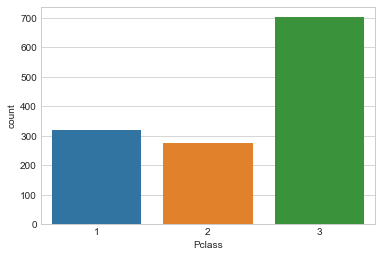

In [75]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [76]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,male,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,female,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,female,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,female,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,male,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


<a id = "27"></a><br>
## Sex

In [77]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id = "28"></a><br>
## Drop Passenger ID and Cabin 

In [78]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [79]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [80]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.0,22.0,1,0,7.2500,0,0,1,0,2,...,0,0,0,0,0,0,0,1,0,1
1,1.0,38.0,1,0,71.2833,0,1,0,0,2,...,0,0,0,0,0,1,0,0,1,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,1.0,35.0,1,0,53.1000,0,1,0,0,2,...,0,0,0,0,1,1,0,0,1,0
4,0.0,35.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id = "29"></a><br>
# Modeling

In [81]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier

#!pip install xgboost
from xgboost import XGBClassifier

#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

#!pip install catboost
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score

<a id = "30"></a><br>
## Train - Test Split

In [82]:
train_df_len

881

In [83]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)


/Users/demir/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [84]:
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
881,34.5,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
882,47.0,1,0,7.0000,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
883,62.0,0,0,9.6875,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
884,27.0,0,0,8.6625,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
885,22.0,1,1,12.2875,0,1,0,0,3,0,...,0,0,0,0,1,0,0,1,1,0


In [85]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 590
X_test 291
y_train 590
y_test 291
test 418


<a id = "31"></a><br>
## Simple Logistic Regression

In [86]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 82.71
Testing Accuracy: % 81.79


<a id = "32"></a><br>
## Hyperparameter Tuning -- Grid Search -- Cross Validation
We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.

* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [87]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state,max_iter=3000),
             KNeighborsClassifier(),
             GradientBoostingClassifier(),
             XGBClassifier(),
             LGBMClassifier(),
             CatBoostClassifier()
             ]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
gbm_params_grid = {"learning_rate" : [0.01, 0.1],
             "n_estimators": [500,1000],
             "max_depth": [3,5],
             "min_samples_split": [2,5]}
xgb_params_grid = {
        'n_estimators': [100],
        'subsample': [0.6],
        'max_depth': [3],
        'learning_rate': [0.1],
        "min_samples_split": [2]}
lgbm_params_grid = {
        'n_estimators': [100, 500],
        'subsample': [0.6, 0.8],
        'max_depth': [3, 4],
        'learning_rate': [0.1,0.05],
        "min_child_samples": [5,10]}
catb_params_grid = {'iterations': [200,500],
                'learning_rate': [0.01,0.05],
                'depth': [3,5] }
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid,
                   gbm_params_grid,
                   xgb_params_grid,
                   lgbm_params_grid,
                   catb_params_grid ]

In [88]:
cv_result = []
best_estimators = []
best_params=[]
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_params.append(clf.best_params_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7983050847457627
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.840677966101695
Fitting 10 folds for each of 7 candidates, totalling 70 fits
0.8220338983050846
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7779661016949152
Fitting 10 folds for each of 16 candidates, totalling 160 fits
0.8508474576271187
Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Users/demir/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/demir/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/demir/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklea

[16:40:27] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:40:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8237288135593219
Fitting 10 folds for each of 32 candidates, totalling 320 fits
0.8474576271186441
Fitting 10 folds for each of 8 candidates, totalling 80 fits
[16:40:26] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly pass

128:	learn: 0.4532868	total: 74.2ms	remaining: 213ms
129:	learn: 0.4525987	total: 74.9ms	remaining: 213ms
130:	learn: 0.4520607	total: 75.8ms	remaining: 214ms
131:	learn: 0.4516156	total: 76.6ms	remaining: 214ms
132:	learn: 0.4513159	total: 77ms	remaining: 212ms
133:	learn: 0.4507559	total: 77.3ms	remaining: 211ms
134:	learn: 0.4504139	total: 77.7ms	remaining: 210ms
135:	learn: 0.4501402	total: 78ms	remaining: 209ms
136:	learn: 0.4498180	total: 78.4ms	remaining: 208ms
137:	learn: 0.4494078	total: 78.7ms	remaining: 206ms
138:	learn: 0.4487696	total: 79ms	remaining: 205ms
139:	learn: 0.4481722	total: 79.4ms	remaining: 204ms
140:	learn: 0.4476641	total: 79.7ms	remaining: 203ms
141:	learn: 0.4469031	total: 80ms	remaining: 202ms
142:	learn: 0.4466726	total: 80.4ms	remaining: 201ms
143:	learn: 0.4461385	total: 80.7ms	remaining: 200ms
144:	learn: 0.4457540	total: 81ms	remaining: 198ms
145:	learn: 0.4453305	total: 81.3ms	remaining: 197ms
146:	learn: 0.4450152	total: 81.6ms	remaining: 196ms
147

196:	learn: 0.3243394	total: 98.9ms	remaining: 1.5ms
197:	learn: 0.3237738	total: 99.7ms	remaining: 1.01ms
198:	learn: 0.3233551	total: 101ms	remaining: 505us
199:	learn: 0.3221851	total: 101ms	remaining: 0us
0:	learn: 0.6863589	total: 367us	remaining: 184ms
1:	learn: 0.6815136	total: 689us	remaining: 172ms
2:	learn: 0.6758776	total: 1ms	remaining: 166ms
3:	learn: 0.6703256	total: 1.64ms	remaining: 203ms
4:	learn: 0.6658462	total: 2.18ms	remaining: 215ms
5:	learn: 0.6608191	total: 2.49ms	remaining: 205ms
6:	learn: 0.6564935	total: 2.82ms	remaining: 198ms
7:	learn: 0.6510561	total: 3.12ms	remaining: 192ms
8:	learn: 0.6466707	total: 3.44ms	remaining: 187ms
9:	learn: 0.6421700	total: 3.94ms	remaining: 193ms
10:	learn: 0.6381639	total: 4.25ms	remaining: 189ms
11:	learn: 0.6341894	total: 4.56ms	remaining: 185ms
12:	learn: 0.6297665	total: 4.87ms	remaining: 183ms
13:	learn: 0.6247140	total: 5.18ms	remaining: 180ms
14:	learn: 0.6209024	total: 5.48ms	remaining: 177ms
15:	learn: 0.6170425	total

114:	learn: 0.3497806	total: 52.4ms	remaining: 175ms
115:	learn: 0.3493457	total: 52.7ms	remaining: 175ms
116:	learn: 0.3488070	total: 53.1ms	remaining: 174ms
117:	learn: 0.3478505	total: 53.5ms	remaining: 173ms
118:	learn: 0.3473349	total: 53.8ms	remaining: 172ms
119:	learn: 0.3468099	total: 54.2ms	remaining: 171ms
120:	learn: 0.3463877	total: 54.5ms	remaining: 171ms
12:	learn: 0.6349206	total: 4.45ms	remaining: 167ms
13:	learn: 0.6310090	total: 4.79ms	remaining: 166ms
14:	learn: 0.6276770	total: 5.12ms	remaining: 166ms
15:	learn: 0.6236502	total: 5.43ms	remaining: 164ms
16:	learn: 0.6201787	total: 5.74ms	remaining: 163ms
17:	learn: 0.6164262	total: 6.03ms	remaining: 162ms
18:	learn: 0.6125963	total: 6.35ms	remaining: 161ms
19:	learn: 0.6087018	total: 7.27ms	remaining: 174ms
20:	learn: 0.6043149	total: 7.89ms	remaining: 180ms
21:	learn: 0.6011120	total: 8.71ms	remaining: 189ms
22:	learn: 0.5968845	total: 9.19ms	remaining: 191ms
23:	learn: 0.5933266	total: 9.51ms	remaining: 189ms
24:	l

132:	learn: 0.3478299	total: 65.1ms	remaining: 180ms
133:	learn: 0.3471857	total: 65.4ms	remaining: 179ms
134:	learn: 0.3468008	total: 66.6ms	remaining: 180ms
135:	learn: 0.3464484	total: 67.4ms	remaining: 181ms
136:	learn: 0.3462058	total: 67.8ms	remaining: 180ms
137:	learn: 0.3460013	total: 68.1ms	remaining: 179ms
138:	learn: 0.3455004	total: 68.4ms	remaining: 178ms
139:	learn: 0.3452133	total: 69.3ms	remaining: 178ms
140:	learn: 0.3447642	total: 69.6ms	remaining: 177ms
141:	learn: 0.3444958	total: 69.9ms	remaining: 176ms
142:	learn: 0.3443145	total: 70.2ms	remaining: 175ms
143:	learn: 0.3438200	total: 70.5ms	remaining: 174ms
144:	learn: 0.3432694	total: 70.9ms	remaining: 173ms
145:	learn: 0.3431333	total: 71.2ms	remaining: 173ms
146:	learn: 0.3430093	total: 71.5ms	remaining: 172ms
147:	learn: 0.3427529	total: 71.8ms	remaining: 171ms
148:	learn: 0.3425365	total: 72.1ms	remaining: 170ms
149:	learn: 0.3421651	total: 72.4ms	remaining: 169ms
150:	learn: 0.3419971	total: 72.8ms	remaining:

147:	learn: 0.3264855	total: 69.6ms	remaining: 165ms
148:	learn: 0.3262946	total: 69.9ms	remaining: 165ms
149:	learn: 0.3255824	total: 70.2ms	remaining: 164ms
150:	learn: 0.3254205	total: 70.5ms	remaining: 163ms
151:	learn: 0.3253171	total: 70.8ms	remaining: 162ms
152:	learn: 0.3247926	total: 71.2ms	remaining: 161ms
153:	learn: 0.3245788	total: 71.5ms	remaining: 161ms
154:	learn: 0.3244477	total: 71.8ms	remaining: 160ms
155:	learn: 0.3243013	total: 72ms	remaining: 159ms
156:	learn: 0.3241625	total: 72.3ms	remaining: 158ms
157:	learn: 0.3240624	total: 72.6ms	remaining: 157ms
158:	learn: 0.3236304	total: 72.9ms	remaining: 156ms
159:	learn: 0.3232036	total: 73.2ms	remaining: 156ms
160:	learn: 0.3221485	total: 73.5ms	remaining: 155ms
161:	learn: 0.3220162	total: 73.9ms	remaining: 154ms
162:	learn: 0.3218768	total: 74.7ms	remaining: 155ms
163:	learn: 0.3217513	total: 75.4ms	remaining: 154ms
164:	learn: 0.3216325	total: 76ms	remaining: 154ms
165:	learn: 0.3213241	total: 76.6ms	remaining: 154

256:	learn: 0.3006523	total: 155ms	remaining: 146ms
257:	learn: 0.2995099	total: 155ms	remaining: 145ms
258:	learn: 0.2992590	total: 155ms	remaining: 145ms
259:	learn: 0.2980528	total: 156ms	remaining: 144ms
260:	learn: 0.2971310	total: 156ms	remaining: 143ms
261:	learn: 0.2969326	total: 156ms	remaining: 142ms
262:	learn: 0.2961503	total: 157ms	remaining: 141ms
263:	learn: 0.2955784	total: 157ms	remaining: 140ms
264:	learn: 0.2954243	total: 160ms	remaining: 141ms
265:	learn: 0.2950966	total: 160ms	remaining: 141ms
266:	learn: 0.2945255	total: 161ms	remaining: 140ms
267:	learn: 0.2944412	total: 161ms	remaining: 139ms
268:	learn: 0.2943694	total: 161ms	remaining: 139ms
269:	learn: 0.2941526	total: 162ms	remaining: 138ms
270:	learn: 0.2938811	total: 162ms	remaining: 137ms
271:	learn: 0.2936409	total: 162ms	remaining: 136ms
272:	learn: 0.2931422	total: 163ms	remaining: 135ms
273:	learn: 0.2927249	total: 163ms	remaining: 134ms
274:	learn: 0.2925795	total: 163ms	remaining: 134ms
275:	learn: 

449:	learn: 0.2474301	total: 258ms	remaining: 28.6ms
450:	learn: 0.2471847	total: 258ms	remaining: 28ms
451:	learn: 0.2463261	total: 258ms	remaining: 27.4ms
452:	learn: 0.2460155	total: 259ms	remaining: 26.9ms
453:	learn: 0.2459603	total: 259ms	remaining: 26.3ms
454:	learn: 0.2457354	total: 259ms	remaining: 25.7ms
455:	learn: 0.2455277	total: 260ms	remaining: 25.1ms
456:	learn: 0.2449873	total: 260ms	remaining: 24.5ms
457:	learn: 0.2446103	total: 260ms	remaining: 23.9ms
458:	learn: 0.2443944	total: 261ms	remaining: 23.3ms
459:	learn: 0.2441077	total: 261ms	remaining: 22.7ms
460:	learn: 0.2439726	total: 262ms	remaining: 22.2ms
461:	learn: 0.2437721	total: 263ms	remaining: 21.6ms
462:	learn: 0.2437380	total: 263ms	remaining: 21ms
463:	learn: 0.2433491	total: 264ms	remaining: 20.5ms
464:	learn: 0.2432685	total: 264ms	remaining: 19.9ms
465:	learn: 0.2428918	total: 265ms	remaining: 19.3ms
466:	learn: 0.2426985	total: 266ms	remaining: 18.8ms
467:	learn: 0.2426002	total: 267ms	remaining: 18.2

150:	learn: 0.4183972	total: 403ms	remaining: 131ms
151:	learn: 0.4177507	total: 405ms	remaining: 128ms
152:	learn: 0.4174368	total: 406ms	remaining: 125ms
153:	learn: 0.4168331	total: 409ms	remaining: 122ms
154:	learn: 0.4161230	total: 410ms	remaining: 119ms
155:	learn: 0.4158951	total: 412ms	remaining: 116ms
156:	learn: 0.4152911	total: 413ms	remaining: 113ms
157:	learn: 0.4149249	total: 415ms	remaining: 110ms
158:	learn: 0.4144508	total: 415ms	remaining: 107ms
159:	learn: 0.4142011	total: 416ms	remaining: 104ms
160:	learn: 0.4140116	total: 417ms	remaining: 101ms
161:	learn: 0.4136700	total: 417ms	remaining: 97.9ms
162:	learn: 0.4133359	total: 418ms	remaining: 94.9ms
163:	learn: 0.4130747	total: 419ms	remaining: 92ms
164:	learn: 0.4124249	total: 420ms	remaining: 89.2ms
165:	learn: 0.4120292	total: 422ms	remaining: 86.4ms
166:	learn: 0.4116387	total: 423ms	remaining: 83.5ms
167:	learn: 0.4113856	total: 424ms	remaining: 80.8ms
168:	learn: 0.4111102	total: 425ms	remaining: 78ms
169:	lea

156:	learn: 0.2893473	total: 183ms	remaining: 50.1ms
157:	learn: 0.2891335	total: 184ms	remaining: 48.9ms
158:	learn: 0.2888413	total: 186ms	remaining: 47.9ms
159:	learn: 0.2880720	total: 187ms	remaining: 46.8ms
160:	learn: 0.2866905	total: 188ms	remaining: 45.5ms
161:	learn: 0.2860058	total: 189ms	remaining: 44.3ms
162:	learn: 0.2857106	total: 189ms	remaining: 43ms
163:	learn: 0.2855428	total: 190ms	remaining: 41.7ms
164:	learn: 0.2851618	total: 191ms	remaining: 40.5ms
165:	learn: 0.2845016	total: 191ms	remaining: 39.2ms
166:	learn: 0.2843388	total: 192ms	remaining: 38ms
167:	learn: 0.2833869	total: 194ms	remaining: 37ms
168:	learn: 0.2832249	total: 196ms	remaining: 35.9ms
169:	learn: 0.2827978	total: 197ms	remaining: 34.7ms
170:	learn: 0.2824607	total: 198ms	remaining: 33.6ms
171:	learn: 0.2820728	total: 199ms	remaining: 32.4ms
172:	learn: 0.2817096	total: 201ms	remaining: 31.3ms
173:	learn: 0.2812096	total: 202ms	remaining: 30.2ms
174:	learn: 0.2806437	total: 203ms	remaining: 29ms
1

183:	learn: 0.2595300	total: 276ms	remaining: 24ms
184:	learn: 0.2591229	total: 277ms	remaining: 22.4ms
185:	learn: 0.2588626	total: 277ms	remaining: 20.9ms
186:	learn: 0.2584091	total: 278ms	remaining: 19.3ms
187:	learn: 0.2581909	total: 280ms	remaining: 17.9ms
188:	learn: 0.2575702	total: 281ms	remaining: 16.4ms
189:	learn: 0.2564739	total: 282ms	remaining: 14.8ms
190:	learn: 0.2562792	total: 283ms	remaining: 13.3ms
191:	learn: 0.2556492	total: 284ms	remaining: 11.8ms
192:	learn: 0.2547598	total: 285ms	remaining: 10.3ms
193:	learn: 0.2546805	total: 285ms	remaining: 8.83ms
194:	learn: 0.2531967	total: 286ms	remaining: 7.34ms
195:	learn: 0.2530982	total: 288ms	remaining: 5.88ms
196:	learn: 0.2527900	total: 291ms	remaining: 4.43ms
197:	learn: 0.2522292	total: 292ms	remaining: 2.95ms
198:	learn: 0.2517105	total: 293ms	remaining: 1.47ms
199:	learn: 0.2516294	total: 293ms	remaining: 0us
0:	learn: 0.6856732	total: 810us	remaining: 404ms
1:	learn: 0.6817895	total: 1.04ms	remaining: 260ms
2:	

175:	learn: 0.4001385	total: 195ms	remaining: 358ms
176:	learn: 0.3997750	total: 196ms	remaining: 357ms
177:	learn: 0.3995765	total: 197ms	remaining: 356ms
178:	learn: 0.3992404	total: 198ms	remaining: 356ms
179:	learn: 0.3988236	total: 200ms	remaining: 355ms
180:	learn: 0.3983582	total: 201ms	remaining: 354ms
181:	learn: 0.3980781	total: 202ms	remaining: 353ms
182:	learn: 0.3978538	total: 203ms	remaining: 352ms
183:	learn: 0.3973936	total: 205ms	remaining: 352ms
184:	learn: 0.3970551	total: 211ms	remaining: 359ms
185:	learn: 0.3967984	total: 215ms	remaining: 363ms
186:	learn: 0.3962980	total: 220ms	remaining: 367ms
187:	learn: 0.3954180	total: 224ms	remaining: 372ms
188:	learn: 0.3951480	total: 225ms	remaining: 371ms
189:	learn: 0.3947493	total: 228ms	remaining: 372ms
190:	learn: 0.3944532	total: 230ms	remaining: 372ms
191:	learn: 0.3941824	total: 232ms	remaining: 372ms
192:	learn: 0.3938903	total: 234ms	remaining: 372ms
193:	learn: 0.3935029	total: 237ms	remaining: 374ms
194:	learn: 

432:	learn: 0.3253918	total: 510ms	remaining: 78.9ms
433:	learn: 0.3252191	total: 511ms	remaining: 77.6ms
434:	learn: 0.3251389	total: 511ms	remaining: 76.4ms
435:	learn: 0.3250867	total: 512ms	remaining: 75.1ms
436:	learn: 0.3250158	total: 513ms	remaining: 73.9ms
437:	learn: 0.3249286	total: 513ms	remaining: 72.6ms
438:	learn: 0.3248055	total: 515ms	remaining: 71.5ms
439:	learn: 0.3246784	total: 516ms	remaining: 70.4ms
440:	learn: 0.3244383	total: 518ms	remaining: 69.3ms
441:	learn: 0.3243830	total: 519ms	remaining: 68.1ms
442:	learn: 0.3242343	total: 520ms	remaining: 66.9ms
443:	learn: 0.3241187	total: 520ms	remaining: 65.6ms
444:	learn: 0.3239427	total: 521ms	remaining: 64.4ms
445:	learn: 0.3239172	total: 521ms	remaining: 63.1ms
446:	learn: 0.3238506	total: 523ms	remaining: 62ms
447:	learn: 0.3237069	total: 524ms	remaining: 60.8ms
448:	learn: 0.3235660	total: 525ms	remaining: 59.6ms
449:	learn: 0.3233530	total: 525ms	remaining: 58.4ms
450:	learn: 0.3232884	total: 526ms	remaining: 57

384:	learn: 0.3514341	total: 493ms	remaining: 147ms
385:	learn: 0.3512921	total: 494ms	remaining: 146ms
386:	learn: 0.3512362	total: 495ms	remaining: 144ms
387:	learn: 0.3511207	total: 495ms	remaining: 143ms
388:	learn: 0.3509098	total: 496ms	remaining: 142ms
389:	learn: 0.3507838	total: 497ms	remaining: 140ms
390:	learn: 0.3507256	total: 498ms	remaining: 139ms
391:	learn: 0.3505684	total: 499ms	remaining: 137ms
392:	learn: 0.3505205	total: 499ms	remaining: 136ms
393:	learn: 0.3503634	total: 500ms	remaining: 135ms
394:	learn: 0.3502924	total: 501ms	remaining: 133ms
395:	learn: 0.3500945	total: 501ms	remaining: 132ms
396:	learn: 0.3500103	total: 502ms	remaining: 130ms
397:	learn: 0.3499342	total: 503ms	remaining: 129ms
398:	learn: 0.3494963	total: 504ms	remaining: 128ms
399:	learn: 0.3494443	total: 506ms	remaining: 126ms
400:	learn: 0.3492801	total: 507ms	remaining: 125ms
401:	learn: 0.3490427	total: 517ms	remaining: 126ms
402:	learn: 0.3489989	total: 518ms	remaining: 125ms
403:	learn: 

300:	learn: 0.2264077	total: 388ms	remaining: 257ms
301:	learn: 0.2261264	total: 389ms	remaining: 255ms
302:	learn: 0.2257169	total: 393ms	remaining: 256ms
303:	learn: 0.2249137	total: 394ms	remaining: 254ms
304:	learn: 0.2243818	total: 395ms	remaining: 252ms
305:	learn: 0.2235708	total: 397ms	remaining: 251ms
306:	learn: 0.2230784	total: 400ms	remaining: 252ms
307:	learn: 0.2222340	total: 401ms	remaining: 250ms
308:	learn: 0.2213528	total: 402ms	remaining: 249ms
309:	learn: 0.2212973	total: 403ms	remaining: 247ms
310:	learn: 0.2208479	total: 404ms	remaining: 246ms
311:	learn: 0.2204341	total: 405ms	remaining: 244ms
312:	learn: 0.2202677	total: 405ms	remaining: 242ms
313:	learn: 0.2201885	total: 406ms	remaining: 241ms
314:	learn: 0.2198458	total: 407ms	remaining: 239ms
315:	learn: 0.2197211	total: 408ms	remaining: 237ms
316:	learn: 0.2193053	total: 408ms	remaining: 236ms
317:	learn: 0.2190328	total: 409ms	remaining: 234ms
318:	learn: 0.2188617	total: 410ms	remaining: 232ms
319:	learn: 

0:	learn: 0.6660309	total: 59.2ms	remaining: 11.8s
1:	learn: 0.6435986	total: 59.9ms	remaining: 5.92s
2:	learn: 0.6239969	total: 61ms	remaining: 4s
3:	learn: 0.6085498	total: 61.3ms	remaining: 3s
4:	learn: 0.5918243	total: 62.4ms	remaining: 2.43s
5:	learn: 0.5724437	total: 62.9ms	remaining: 2.03s
6:	learn: 0.5546451	total: 63.9ms	remaining: 1.76s
7:	learn: 0.5449427	total: 64.5ms	remaining: 1.55s
8:	learn: 0.5333274	total: 64.9ms	remaining: 1.38s
9:	learn: 0.5248480	total: 65.3ms	remaining: 1.24s
10:	learn: 0.5132322	total: 65.8ms	remaining: 1.13s
11:	learn: 0.5052085	total: 66.3ms	remaining: 1.04s
12:	learn: 0.4974354	total: 66.7ms	remaining: 960ms
13:	learn: 0.4908534	total: 67.8ms	remaining: 901ms
14:	learn: 0.4835499	total: 69.1ms	remaining: 853ms
15:	learn: 0.4786084	total: 69.6ms	remaining: 800ms
16:	learn: 0.4746068	total: 70ms	remaining: 754ms
17:	learn: 0.4706990	total: 70.5ms	remaining: 712ms
18:	learn: 0.4656020	total: 70.9ms	remaining: 676ms
19:	learn: 0.4615747	total: 71.4

/Users/demir/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cross Validation Scores')

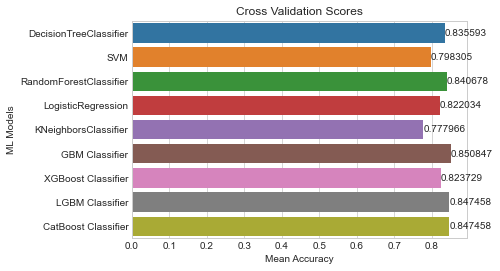

In [89]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression","KNeighborsClassifier","GBM Classifier","XGBoost Classifier",
             "LGBM Classifier", "CatBoost Classifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.bar_label(g.containers[0])
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

<a id = "33"></a><br>
## Ensemble Modeling

In [90]:
votingC = VotingClassifier(estimators = [("Gbm",best_estimators[5]),
                                        ("Lgbm",best_estimators[7]),
                                        ("Cboost",best_estimators[8])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

104:	learn: 0.3149680	total: 137ms	remaining: 514ms
105:	learn: 0.3144057	total: 138ms	remaining: 513ms
106:	learn: 0.3137033	total: 141ms	remaining: 517ms
107:	learn: 0.3126438	total: 141ms	remaining: 513ms
108:	learn: 0.3123058	total: 142ms	remaining: 510ms
109:	learn: 0.3119334	total: 143ms	remaining: 506ms
110:	learn: 0.3110697	total: 144ms	remaining: 503ms
111:	learn: 0.3109488	total: 144ms	remaining: 500ms
112:	learn: 0.3106502	total: 146ms	remaining: 499ms
113:	learn: 0.3101158	total: 147ms	remaining: 497ms
114:	learn: 0.3095735	total: 148ms	remaining: 497ms
115:	learn: 0.3090462	total: 150ms	remaining: 496ms
116:	learn: 0.3089057	total: 151ms	remaining: 495ms
117:	learn: 0.3074627	total: 153ms	remaining: 494ms
118:	learn: 0.3067020	total: 154ms	remaining: 492ms
119:	learn: 0.3066291	total: 154ms	remaining: 488ms
120:	learn: 0.3063452	total: 155ms	remaining: 486ms
121:	learn: 0.3061848	total: 167ms	remaining: 518ms
122:	learn: 0.3059120	total: 168ms	remaining: 516ms
123:	learn: 

0.8213058419243986


<a id = "34"></a><br>
## Prediction and Submission

In [91]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)

In [92]:
best_params[5]

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [93]:
gbm = GradientBoostingClassifier(learning_rate = 0.01,
 max_depth = 3,
 min_samples_split = 2,
 n_estimators = 500)
gbm_tuned = gbm.fit(X_train,y_train)
test_survived = pd.Series(gbm_tuned.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

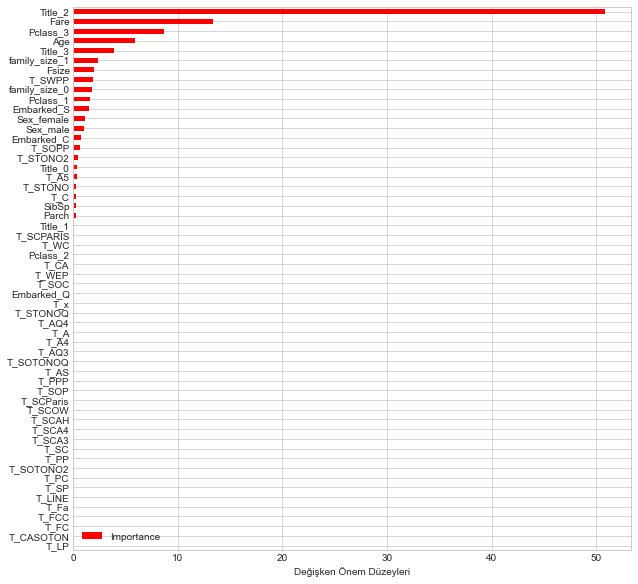

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [95]:
# save the model to disk
import joblib
filename = 'finalized_model.sav'
joblib.dump(gbm_tuned, filename)

['finalized_model.sav']

In [96]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.8247422680412371


In [97]:
import streamlit as st

111:	learn: 0.3289997	total: 125ms	remaining: 432ms
112:	learn: 0.3277796	total: 126ms	remaining: 433ms
113:	learn: 0.3272352	total: 128ms	remaining: 434ms
114:	learn: 0.3259861	total: 129ms	remaining: 433ms
115:	learn: 0.3251515	total: 131ms	remaining: 433ms
116:	learn: 0.3244331	total: 132ms	remaining: 434ms
117:	learn: 0.3240405	total: 133ms	remaining: 431ms
118:	learn: 0.3236759	total: 134ms	remaining: 429ms
119:	learn: 0.3228886	total: 135ms	remaining: 427ms
120:	learn: 0.3216446	total: 136ms	remaining: 425ms
121:	learn: 0.3213825	total: 136ms	remaining: 422ms
122:	learn: 0.3205648	total: 137ms	remaining: 420ms
123:	learn: 0.3195950	total: 138ms	remaining: 418ms
124:	learn: 0.3188876	total: 138ms	remaining: 415ms
125:	learn: 0.3185428	total: 140ms	remaining: 416ms
126:	learn: 0.3180786	total: 141ms	remaining: 415ms
127:	learn: 0.3166883	total: 143ms	remaining: 414ms
128:	learn: 0.3159434	total: 143ms	remaining: 412ms
129:	learn: 0.3156670	total: 144ms	remaining: 410ms
130:	learn: 

319:	learn: 0.1992165	total: 326ms	remaining: 183ms
320:	learn: 0.1991773	total: 327ms	remaining: 182ms
321:	learn: 0.1989975	total: 328ms	remaining: 181ms
322:	learn: 0.1984984	total: 329ms	remaining: 180ms
323:	learn: 0.1981626	total: 330ms	remaining: 179ms
324:	learn: 0.1979969	total: 331ms	remaining: 178ms
325:	learn: 0.1979339	total: 332ms	remaining: 177ms
326:	learn: 0.1974469	total: 332ms	remaining: 176ms
327:	learn: 0.1970582	total: 333ms	remaining: 175ms
328:	learn: 0.1964208	total: 334ms	remaining: 174ms
329:	learn: 0.1963187	total: 335ms	remaining: 173ms
330:	learn: 0.1962563	total: 336ms	remaining: 171ms
331:	learn: 0.1959722	total: 337ms	remaining: 170ms
332:	learn: 0.1953521	total: 338ms	remaining: 169ms
333:	learn: 0.1947727	total: 339ms	remaining: 168ms
334:	learn: 0.1947154	total: 340ms	remaining: 167ms
335:	learn: 0.1944048	total: 341ms	remaining: 166ms
336:	learn: 0.1932706	total: 341ms	remaining: 165ms
337:	learn: 0.1930731	total: 342ms	remaining: 164ms
338:	learn: 

115:	learn: 0.3130975	total: 131ms	remaining: 433ms
116:	learn: 0.3124433	total: 132ms	remaining: 432ms
117:	learn: 0.3112502	total: 133ms	remaining: 431ms
118:	learn: 0.3097683	total: 134ms	remaining: 429ms
119:	learn: 0.3095104	total: 135ms	remaining: 427ms
120:	learn: 0.3092094	total: 136ms	remaining: 426ms
121:	learn: 0.3086721	total: 137ms	remaining: 424ms
122:	learn: 0.3083568	total: 138ms	remaining: 422ms
123:	learn: 0.3074065	total: 139ms	remaining: 420ms
124:	learn: 0.3066396	total: 140ms	remaining: 420ms
125:	learn: 0.3063373	total: 141ms	remaining: 418ms
126:	learn: 0.3054638	total: 141ms	remaining: 415ms
127:	learn: 0.3047905	total: 143ms	remaining: 414ms
128:	learn: 0.3044084	total: 143ms	remaining: 412ms
129:	learn: 0.3023837	total: 144ms	remaining: 411ms
130:	learn: 0.3021481	total: 145ms	remaining: 409ms
131:	learn: 0.3017491	total: 147ms	remaining: 410ms
132:	learn: 0.3016009	total: 148ms	remaining: 409ms
133:	learn: 0.2999254	total: 150ms	remaining: 408ms
134:	learn: 

235:	learn: 0.2497862	total: 252ms	remaining: 282ms
236:	learn: 0.2494058	total: 253ms	remaining: 281ms
237:	learn: 0.2493213	total: 254ms	remaining: 280ms
238:	learn: 0.2490415	total: 255ms	remaining: 278ms
239:	learn: 0.2481350	total: 256ms	remaining: 277ms
240:	learn: 0.2478255	total: 257ms	remaining: 276ms
241:	learn: 0.2469336	total: 258ms	remaining: 275ms
242:	learn: 0.2465629	total: 259ms	remaining: 274ms
243:	learn: 0.2457283	total: 260ms	remaining: 272ms
244:	learn: 0.2447065	total: 260ms	remaining: 271ms
245:	learn: 0.2442985	total: 261ms	remaining: 270ms
246:	learn: 0.2432012	total: 262ms	remaining: 268ms
247:	learn: 0.2419147	total: 263ms	remaining: 267ms
248:	learn: 0.2412645	total: 263ms	remaining: 266ms
249:	learn: 0.2411678	total: 265ms	remaining: 265ms
250:	learn: 0.2409876	total: 266ms	remaining: 264ms
251:	learn: 0.2402002	total: 267ms	remaining: 263ms
252:	learn: 0.2395799	total: 268ms	remaining: 261ms
253:	learn: 0.2392017	total: 269ms	remaining: 260ms
254:	learn: 